# Raíces de funciones uni-dimensionales

En este notebook, investigaremos algunos algoritmos para encontrar **raíces** de funciones uni-dimensionales, utilizando métodos iterativos. Esto es un problema que ocurre por todos lados en la física, por ejemplo para el pozo cuadrado en mecánica cuántica, o para encontrar el valor máximo de una función.

Recuerda que $x^*$ es una raíz (o cero) de la función $f$ si $f(x^*) = 0$. Como sabemos, en general las raíces de una función no se pueden encontrar de manera analítica, excepto para funciones $f$ que sean polinomios de grado $\le 4$.

Por lo tanto, para encontrar raíces tendremos que utilizar algoritmos iterativos.
Recuerda que un algoritmo iterativo tiene la forma general

$$x_{n+1} := f(x_n),$$

y consiste en comenzar en una *adivinianza* inicial $x_0$ y generar una secuencia $x_1 := f(x_0)$; $x_2 := f(x_1)$, etc.
Si diseñamos correctamente el algoritmo, la esperanza es que la secuencia $(x_n)_{n=1}^\infty$ converja a alguna raíz  $x^*$ con $f(x^*) = 0$, es decir que $f(x_n) \to 0$ cuando $n \to \infty$.

Dado que no podemos llevar a cabo la iteración un número infinito de veces, se corta la iteración después de un cierto número de pasos, para dar una solución *aproximada*, que se encuentra dentro de cierta *tolerancia* del resultado teórico exacto $x^*$. Por lo tanto, cualquier algoritmo iterativo requiere una condición de terminación.

# Raíces de funciones: Bisección

Un primer método para encontrar una raíz es el **método de bisección**.
Dada una función continua $f$, una condición suficiente (pero no necesaria) para que *exista* una raiz en un intervalo dado $[a, b]$ es que $F$ cambie de signo en el intervalo, es decir, que $f(a)$ y $f(b)$ tengan signos opuestos. Si ocurre esto, entonces el teorema del valor intermedio nos dice que se sigue que $f$ sí tiene al menos una raíz en $[a, b]$.

#### Ejercicio 1

La idea del método de bisección es adivinar que el punto medio del intervalo $[a, b]$ sea una primera aproximación para la raíz. Escribamos una función `bisección` que implemente este método, que toma como argumento la función $f$ y los extremos `a` y `b`.

(i) Define una función `punto_medio` que tome $a$ y $b$ y calcule el punto medio entre ellos. Verifica que tu definición sea correcto en algunos casos.

(ii) Sea $c$ el punto medio de $[a, b]$. Esto divide el intervalo original en dos partes. Es posible (aunque improbable) que $c$ ya es la raíz, en cuyo caso ya podemos terminar la función y regresar la raíz que hemos encontrado. ¿Cómo se checa si ya es la raíz? Si no, ¿cómo podemos saber en cuál de los dos sub-intervalos cae la raíz? Impleméntalo. 

(iii) Define un algoritmo iterativo al repitir estos pasos hasta que encuentres la raíz con cierta tolerancia. [Pista: Para la siguiente vuelta del bucle, deberás tener un nuevo intervalo `[a, b]`.
Puedes utilizar una expresión de la forma `(e, f) = (g, h)` para copiar el valor de `g` a la variable `e` y el valor de `h` a la variable `f`.]

(iv) La función debe regresar la raíz que encontró, así como un vector de todos los iterados.

In [1]:
using Plots

In [2]:
#i
function punto_medio(a,b,err)#pedimos un margen de error para obtener un punto medio mas certero
   s=1
    d1=0
    d2=0
    m=0
    while err<s
        m=(a+b)/2
        d1=norm(a-m) 
        d2=norm(b-m)
        s=norm(d1-d2)
    end
    return m
end

punto_medio (generic function with 1 method)

In [3]:
punto_medio(1.11100898,3.9789789,0.000000001)

2.54499394

In [4]:
#ii)
function checar(f,a,b)
    c=Punto_medio(a,b,0.00001)
    if f(c)==0
        return c
        else 
    return "El punto medio no es la raiz"
    end
end

checar (generic function with 1 method)

In [5]:
#iii)
function biseccion(f,a,b,err)
    if f(a)*f(b)>=0
        return error #nos regresa error cuando las condiciones iniciales estan mal
    end
    iterados=[]
    c=punto_medio(a,b,err)
    if f(c)==0
         print("el punto medio es la raiz") #con las condiciones iniciales el primer punto medio 
        return c   #es la raiz
    
    else 
    while norm(f(c))>err
        if f(a)*f(c)<0 #tienen signos opuestos
            b=c   #a,b=a,c
            else 
            a=c     #a,b=c,b
        end
        c=punto_medio(a,b,err)
        push!(iterados,c)
    end
    return c, iterados #iv regresa los iterados en forma de vector
end
end
    

biseccion (generic function with 1 method)

#### Ejercicio 2

(i) Aplica tu función `bisección` para encontrar la raíz cuadrada positiva de $2$. Para hacerlo, tendrás que escoger (a mano) intervalos iniciales que cumplan con la condición de cambio de signo. 

(ii) Define la distancia $d_n := x_n - x^*$, donde $x^*$ es la raíz. Dibuja $d_n$ como función del paso $n$. ¿Qué tan rápidamente converge $d_n$ a $0$? [Pista: Dibuja la gráfica con distintos tipos de escalas para entender la forma funcional de la convergencia.]

(iii) Encuentra la solución de la ecuación $\sin(x) = x$ utilizando bisección. ¿Qué tan rápidamente se acercan los iterados $x_n$ a la solución en este caso?

In [6]:
#i)
r, u=biseccion(x->x^2-2,0,10,0.00001)#las condiciones iniciales cuplen con los signos opuestos

(1.4142131805419922, Any[2.5, 1.25, 1.875, 1.5625, 1.40625, 1.48438, 1.44531, 1.42578, 1.41602, 1.41113, 1.41357, 1.41479, 1.41418, 1.41449, 1.41434, 1.41426, 1.41422, 1.4142, 1.41421])

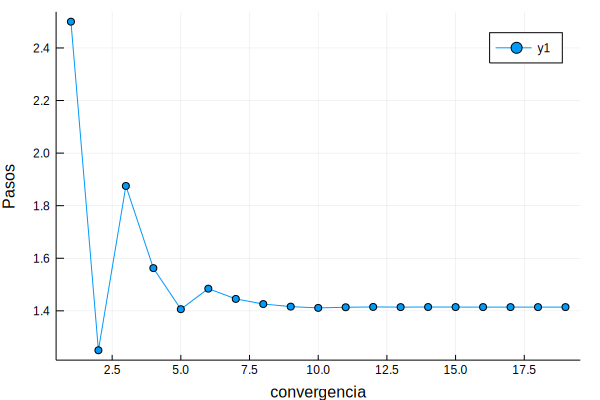

In [7]:
plot(u, m='o',xlabel=("convergencia"), ylabel=("Pasos"))

In [8]:
#ii)
distanciabi=norm.(u.- u[end])#definimos el vector distancia en valor absoluto de la distancia
#de cada paso con respecto al ultimo paso dado

19-element Array{Float64,1}:
 1.08579    
 0.164213   
 0.460787   
 0.148287   
 0.00796318 
 0.0701618  
 0.0310993  
 0.0115681  
 0.00180244 
 0.00308037 
 0.000638962
 0.000581741
 2.86102e-5 
 0.000276566
 0.000123978
 4.76837e-5 
 9.53674e-6 
 9.53674e-6 
 0.0        

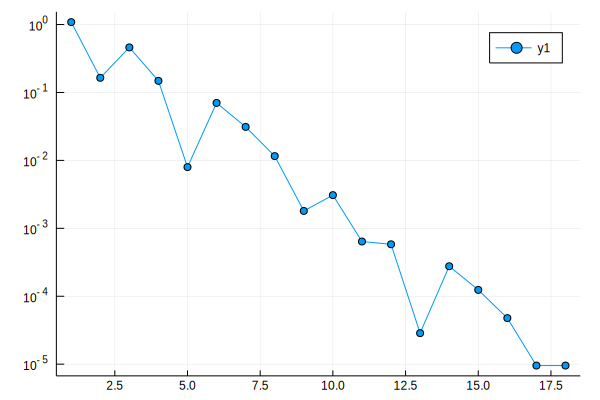

In [9]:
plot(distanciabi[1:end-1],m='o', yscale=:log)#reeescalamos con escala logaritmica en el eje y
#y asi ver la velocidad de convergencia

In [10]:
?linreg

search: 

```
linreg(x, y)
```

Perform simple linear regression using Ordinary Least Squares. Returns `a` and `b` such that `a + b*x` is the closest straight line to the given points `(x, y)`, i.e., such that the squared error between `y` and `a + b*x` is minimized.

**Examples:**

```
using PyPlot
x = 1.0:12.0
y = [5.5, 6.3, 7.6, 8.8, 10.9, 11.79, 13.48, 15.02, 17.77, 20.81, 22.0, 22.99]
a, b = linreg(x, y)          # Linear regression
plot(x, y, "o")              # Plot (x, y) points
plot(x, a + b*x)             # Plot line determined by linear regression
```

See also:

`\`, [`cov`](@ref), [`std`](@ref), [`mean`](@ref).


linreg linearindices LineNumberNode



In [11]:
xl=1:length(distanciabi)-1

1:18

In [12]:
a,b=linreg(xl,log10.(distanciabi[1:end-1]))


(0.19364684409560473, -0.293293487711684)

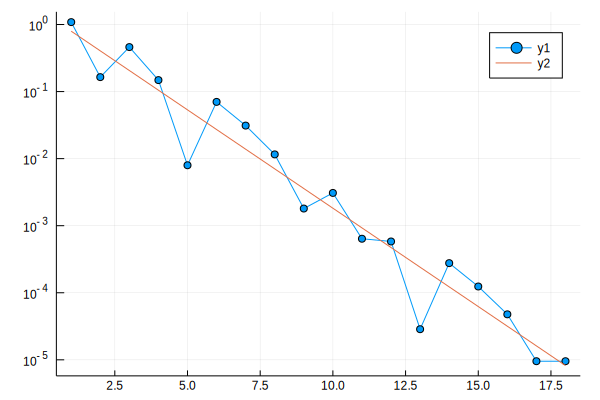

In [13]:

plot!(xl,exp10.(a.+b.*xl))

y como al tomas una yscale=:log observamos lo siguiente $log(y)=mx+b \rightarrow y=C(b)e^{mx}$, es decir el decaimiento es exponencial, ahora alculando las nuevas contantes donde $m:=b$  y $b:=a$ tenemos que :

In [14]:
using SymPy

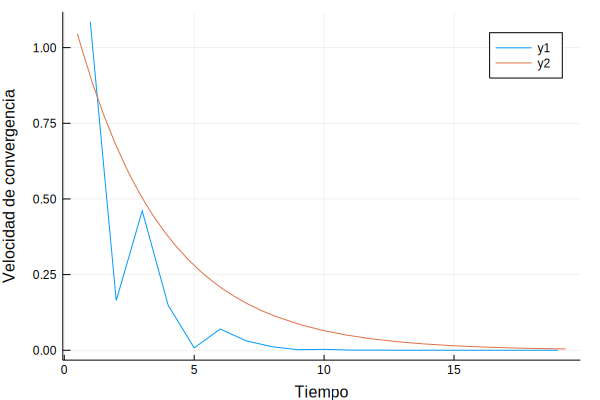

In [15]:
x=Sym("x")

plot(distanciabi, ylabel="Velocidad de convergencia",xlabel="Tiempo")
plot!(exp(a)*exp(b*x))

iii) Encontramos raices de la funcion $sin(x)$

In [16]:
r1,u1=biseccion(x->sin(x),1,5,0.0000001)

(3.1415927410125732, Any[4.0, 3.5, 3.25, 3.125, 3.1875, 3.15625, 3.14063, 3.14844, 3.14453, 3.14258  …  3.14148, 3.14154, 3.14157, 3.14159, 3.14159, 3.14159, 3.14159, 3.14159, 3.14159, 3.14159])

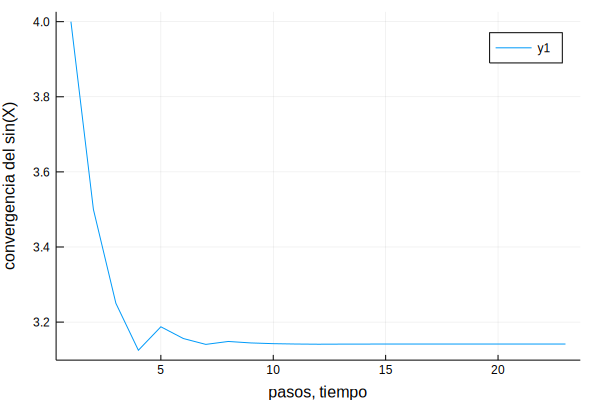

In [17]:
plot(u1,ylabel=("convergencia del sin(X)"),xlabel=("pasos, tiempo"))

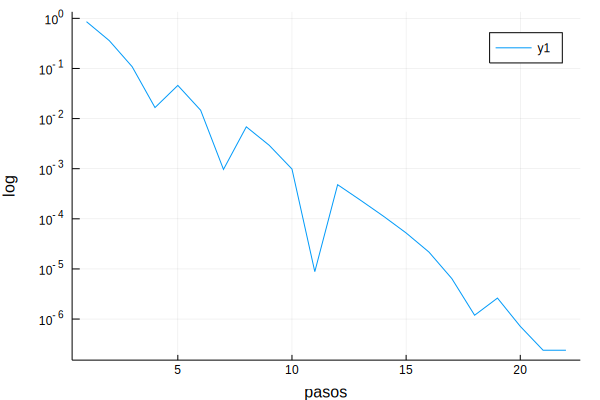

In [18]:
distanciasin=abs.(u1.-u1[end])
plot(distanciasin[1:end-1],yscale=:log,ylabel=("log"),xlabel=("pasos"))
#como al caso anterior tiene una velocidad de convergencia exponencial, con lo que basta ç
#determinar las constantesde esta curva que aproxima nuestros datos

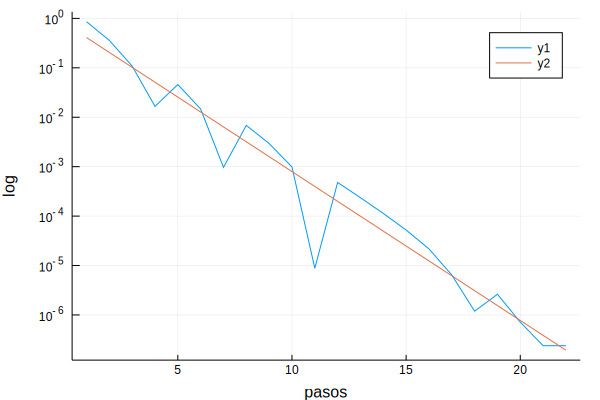

In [19]:
xsin=1:length(distanciasin)-1
a1,b1=linreg(xsin, log10.(distanciasin[1:end-1]))#al ser reescalado y verse en forma lineal se 
#toma la funcion regresion lineal par obtener la pendiente b y la ordenada al origen a
plot!(xsin, exp10.(a1.+b1.*xsin))

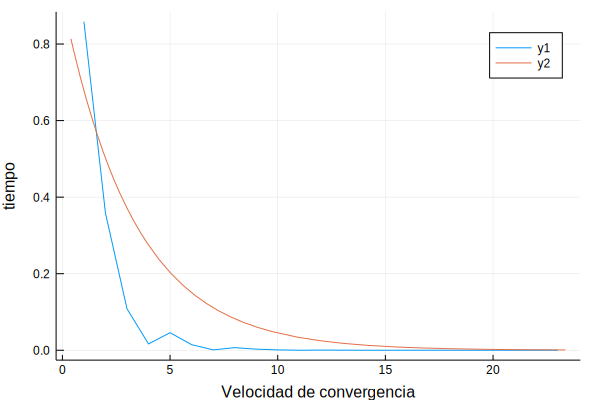

In [20]:
plot(distanciasin, xlabel=("Velocidad de convergencia"), ylabel=("tiempo"))
x=Sym("x")
plot!(exp(a1)*exp(b1*x))#reeescalamos la recta obtenida con exp pues antes fue con log su inversa

# El algoritmo Babilónico

Un ejemplo de un algoritmo sorprendente es el *algoritmo Babilónico* (o de Herón) para calcular la raiz cuadrada $\sqrt{y}$ de un número real $y$. Una forma de este algoritmo se utiliza a menudo para calcular la raíz cuadrada en las computadoras.

Para un algoritmo, siempre necesitamos una *idea*, que toma una adivinanza $x_n$ y produce una (probablemente) mejor, $x_{n+1}$. La idea del algoritmo Babilónico es la siguiente.

#### Ejercicio 3

(i) ¿De cuál ecuación en $x$ es raíz el número $x^* = \sqrt{y}$? ¿Cuál otra solución de esta ecuación hay?

de la ecuacion $f(x)=x^{2}-y$ es solución. La otra solución será $f(x)=(-x)^{2}-y$

(ii) Dada una adivinanza $x_n$, es posible (pero improbable) que $x_n$ ya sea exactamente $\sqrt{y}$. ¿Cómo lo puedes verificar, sin utilizar (por supuesto) alguna función en Julia que calcule la raíz cuadrada? Escribe el código correspondiente.

(iii) Si $x_n$ no es raíz, demuestra con papel que $\frac{y}{x_n}$ se encuentra *del lado opuesto de $\sqrt{y}$ que $x_n$* sobre la recta real. [Pista: Hay dos casos que considerar.]

Para el primer caso tenemos que $x_{n}<\sqrt(y) \rightarrow \frac{1}{\sqrt(y)}<\frac{1}{x_{n}}\rightarrow \frac{y}{\sqrt(y)}<\frac{y}{x_{n}}$ pero $\frac{y \sqrt(y)}{\sqrt(y)\sqrt(y)}=\sqrt(y)$ que a su vez es mayor a $x_{n}$ implica $x_{n}<\frac{y}{x_{n}}$ es decir queda de lados opuestos.

Caso 2  se tines $x_{n}>\sqrt(y) \rightarrow \frac{1}{\sqrt(y)}>\frac{1}{x_{n}}\rightarrow \frac{y}{\sqrt(y)}>\frac{y}{x_{n}}$ pero $\frac{y \sqrt(y)}{\sqrt(y)\sqrt(y)}=\sqrt(y)$ y en este caso tenemos que $x_{n}>\sqrt(y)\rightarrow x_{n}>\frac{y}{x_{n}}$, y así para ambos casos se muestra que quedan a lados opuestos


(iv) Así, tenemos dos valores que se encuentran por dos lados diferentes de $\sqrt{y}$. ¿Cuál sería una mejor adivinanza para $x_{n+1}$? Impleméntalo.

un mejor metodo seria tomar el punto medio $x_{n+1}=\frac{x_{n}+\frac{y}{x_{n}}}{2}$, y como siempre estan en lados opuestos el punto medio cada vez estara más cerca de la raíz.

(v) Utiliza esta idea para escribir una función que calcule $\sqrt{y}$ para una $y$ dada.

(vi) ¿Qué tan rápido converge a la raíz cuadrada? Grafícalo. ¿Cómo se compara con el método de bisección?

No puede terminar que tan rapido converge pues noes como en los casos anteriores.

In [21]:
#(ii)
function ver(y,err)
    f(x)=x^2-y
    if norm(f(y))<err
        true
    else
        false
    end
end

ver (generic function with 1 method)

In [22]:
ver(0,0.001)

true

In [23]:
#(v)
function raiz(y)
    f(x)=x^2-y
    err=0.00001
    xn=f(y)
     u=[]
if y>=0
    if xn<=err
        print(y)
     
    
    else
        while norm(f(xn))>err
        xn=punto_medio(xn,y/xn,err)
        push!(u,xn)      
        end
    
    return xn, u
   end
else
        print("Solo es valido para numeros positivos, prueba otra vez")
    end
   
end     

raiz (generic function with 1 method)

In [24]:
r2,u2=raiz(9)

(3.0000000032198457, Any[36.0625, 18.156, 9.32587, 5.14546, 3.44729, 3.02902, 3.00014, 3.0])

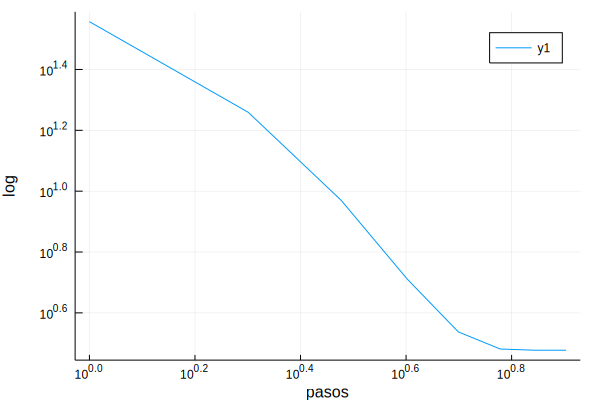

In [25]:
plot(u2, scale=:log, ylabel=("log"), xlabel=("pasos"))

In [26]:
distancia3=abs.(u2.-r2)

8-element Array{Float64,1}:
 33.0625     
 15.156      
  6.32587    
  2.14546    
  0.447288   
  0.029018   
  0.000138993
  0.0        

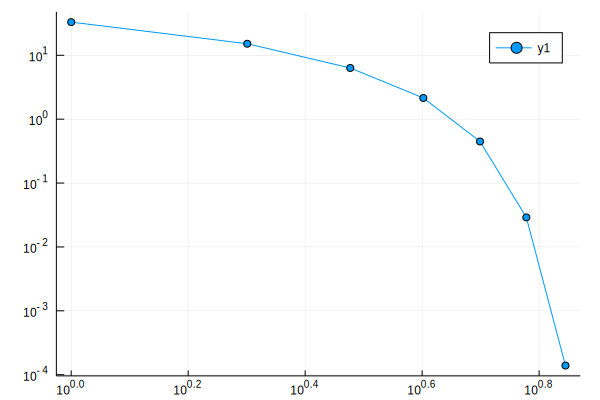

In [27]:
plot(distancia3[1:end-1],m='o', scale=:log)

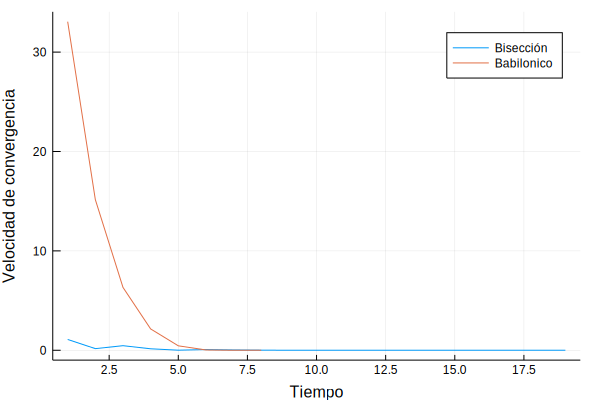

In [28]:
plot(distanciabi, label=("Bisección"), xlabel=("Tiempo"), ylabel=("Velocidad de convergencia"))
plot!(distancia3, label=("Babilonico"))